<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [77]:
import boto3

# create IoT Analytics client
client = boto3.client('iotanalytics')

Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [78]:
dataset = "water_dispenser_data_set"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']

# start working with the data

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>

In [79]:
import pandas as pd

import matplotlib.pyplot as plt

df=pd.read_csv(dataset_url)
df

,date,thingName,dispensedWater,remainingWater
0,2024-06-21T17:46:56.000-04:00,dispensadorsito,200,695.4
1,2024-06-21T17:34:00.000-04:00,dispensadorsito,200,518.2
2,2024-06-21T17:29:11.000-04:00,dispensador,100,691.2
3,2024-06-21T17:29:27.000-04:00,dispensador,200,491.1
4,2024-06-21T17:23:19.000-04:00,dispensadorsito,110,198.4
5,2024-06-21T18:11:41.000-04:00,dispensadorsito,90,504.3
6,2024-06-21T18:11:47.000-04:00,dispensadorsito,50,454.3
7,2024-06-21T18:11:55.000-04:00,dispensadorsito,200,254.2
8,2024-06-21T18:11:13.000-04:00,dispensadorsito,100,794.4
9,2024-06-21T18:11:20.000-04:00,dispensadorsito,100,694.4


# Amount of water dispensed by each dispenser

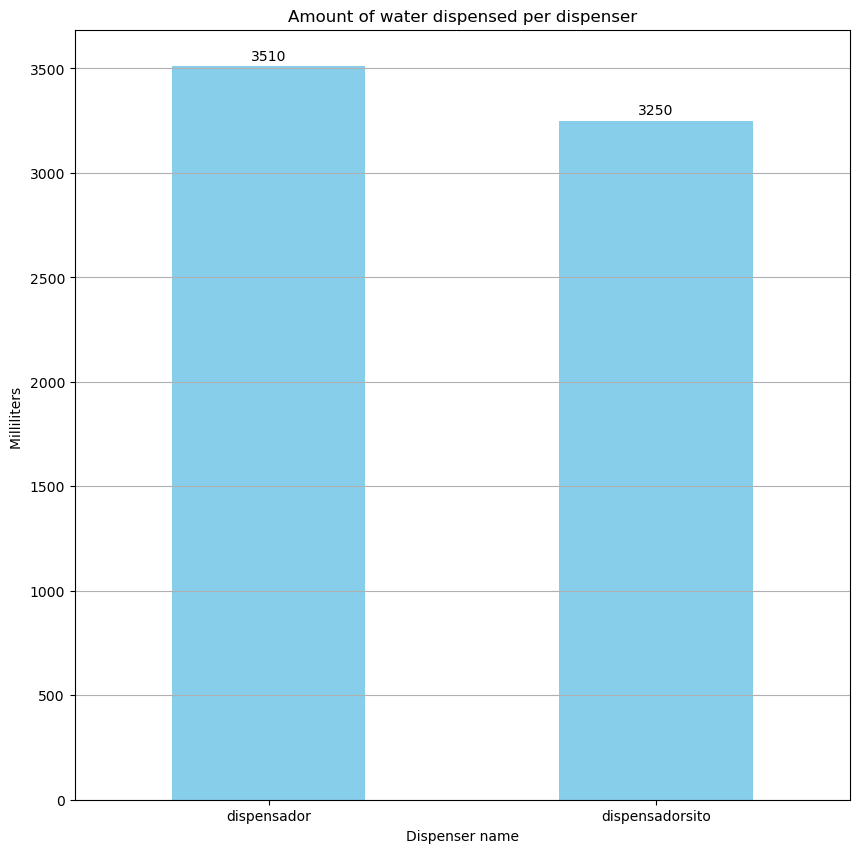

In [80]:
dispensers = df.groupby('thingName')
accumulatedDispensedWater=dispensers['dispensedWater'].sum()
plt.figure(figsize=(10, 10))
accumulatedDispensedWater.plot(kind='bar', color='skyblue')
plt.title('Amount of water dispensed per dispenser')
plt.xlabel('Dispenser name')
plt.ylabel('Milliliters ')
plt.xticks(rotation=0)

for iterator, dispensedWater in enumerate(accumulatedDispensedWater):
    plt.text(iterator, dispensedWater + 15, str(dispensedWater), ha='center', va='bottom', fontsize=10)
    
plt.grid(axis='y')
plt.show()

# Number of times each dispenser has been used

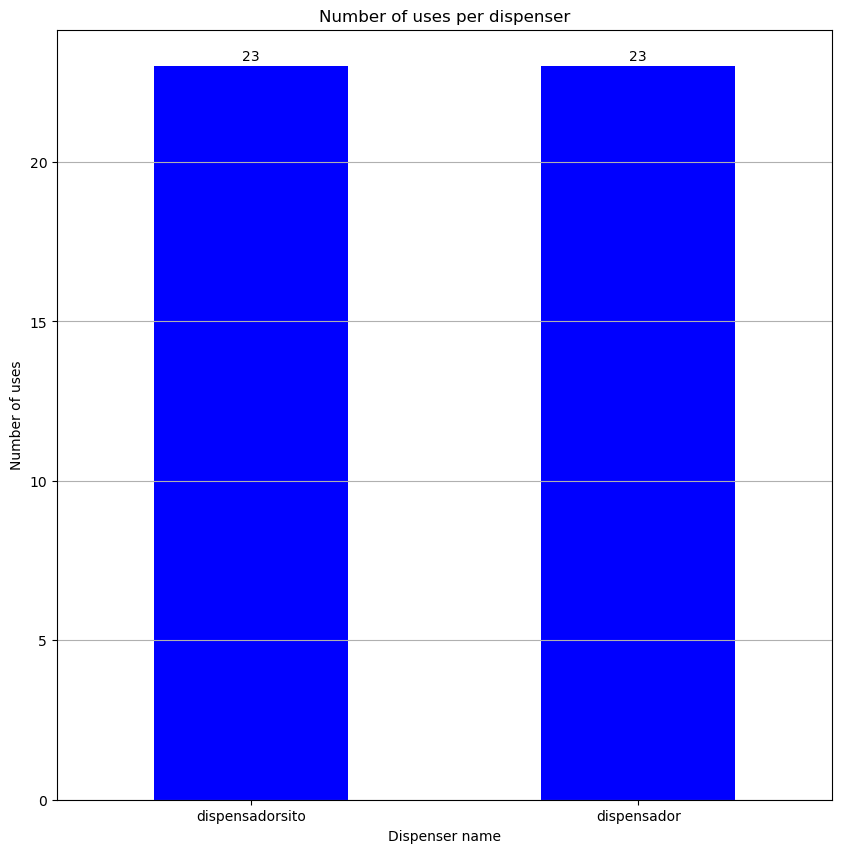

In [81]:
dispensers = df['thingName']
usesPerDispenser=dispensers.value_counts()
plt.figure(figsize=(10, 10))
usesPerDispenser.plot(kind='bar', color='blue')
plt.title('Number of uses per dispenser')
plt.xlabel('Dispenser name')
plt.ylabel('Number of uses')
plt.xticks(rotation=0)

for iterator, timesOfUse in enumerate(usesPerDispenser):
    plt.text(iterator, timesOfUse+0.1 , str(timesOfUse), ha='center', va='bottom', fontsize=10)
    
plt.grid(axis='y')
plt.show()

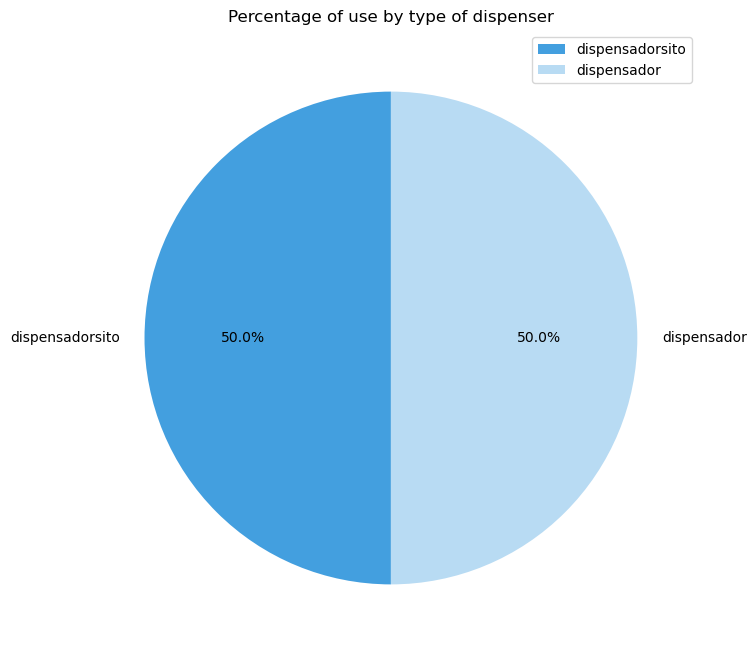

In [82]:
dispensers = df['thingName']
usesPerDispenser=dispensers.value_counts()
plt.figure(figsize=(8, 8))
customColors = ['#439fdf', '#b8dbf3']
usesPerDispenser.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=customColors, legend=True)
plt.title('Percentage of use by type of dispenser')
plt.ylabel('')  
plt.show()

# Changes in tank weight over time for each dispenser

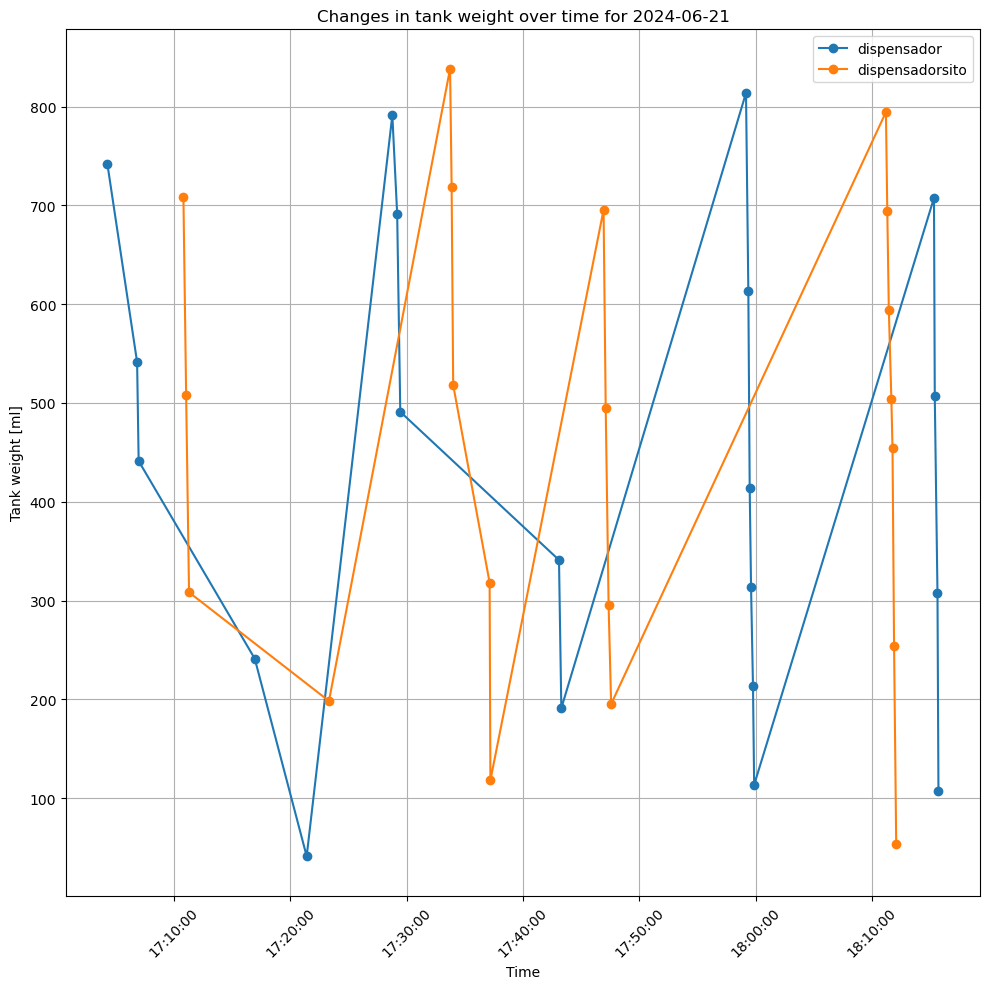

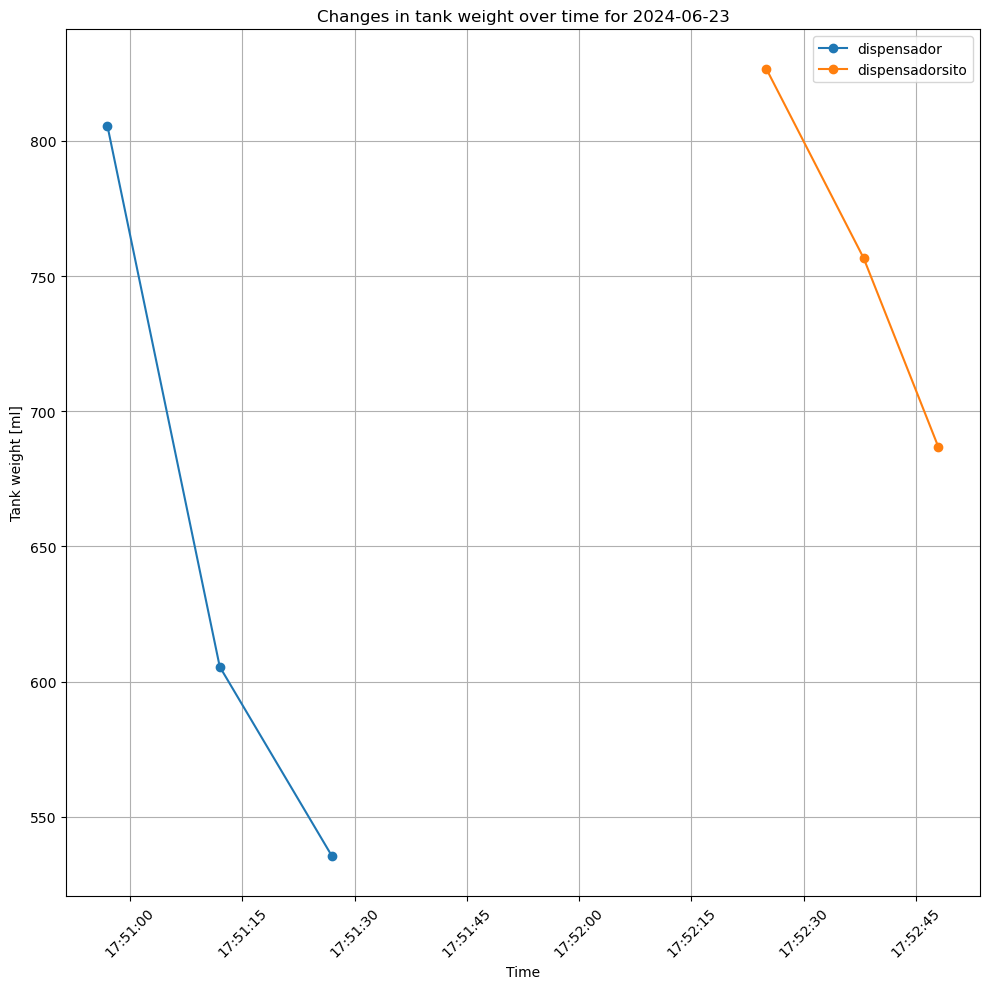

In [83]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.date
dataOrderedByDate = df.sort_values(by='date')
uniqueDays = df['day'].unique()

for day in uniqueDays:
    dataForDay = dataOrderedByDate[dataOrderedByDate['day'] == day]
    plt.figure(figsize=(10,10))
    dispensers = dataForDay.groupby('thingName')
    
    for iterator, dispenser in dispensers:
        plt.plot(dispenser['date'], dispenser['remainingWater'], marker='o', linestyle='-', label=iterator)
        
    formatter = mdates.DateFormatter("%H:%M:%S") ; 
    formatter.set_tzinfo(timezone('America/La_Paz')); 
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.title(f'Changes in tank weight over time for {day}')
    plt.xlabel('Time')
    plt.ylabel('Tank weight [ml]')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


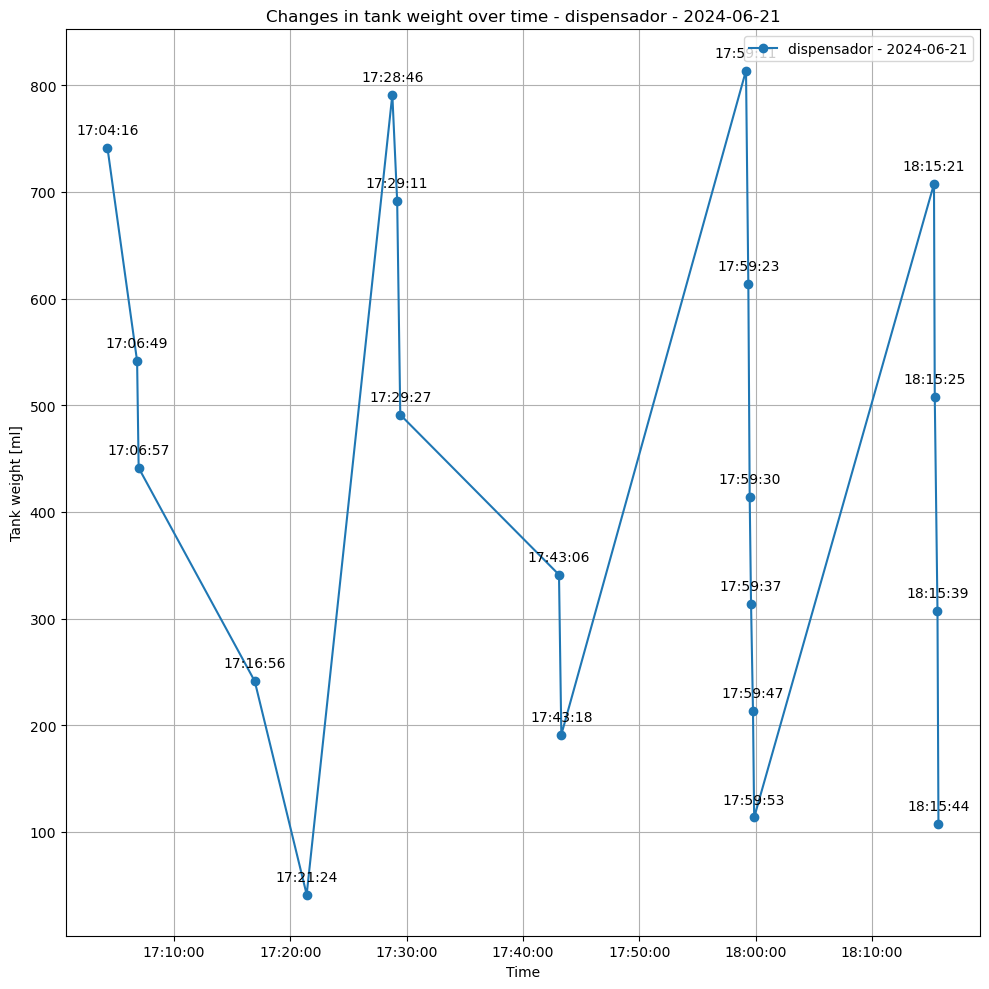

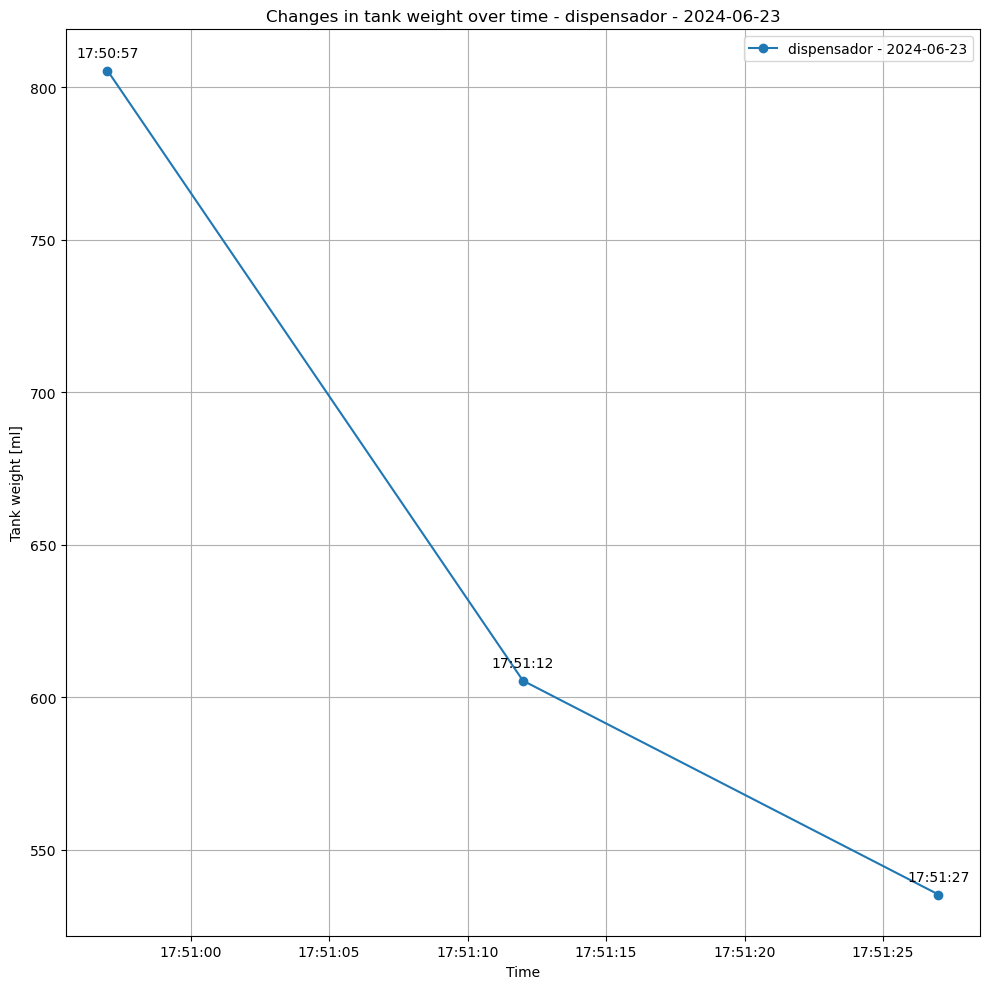

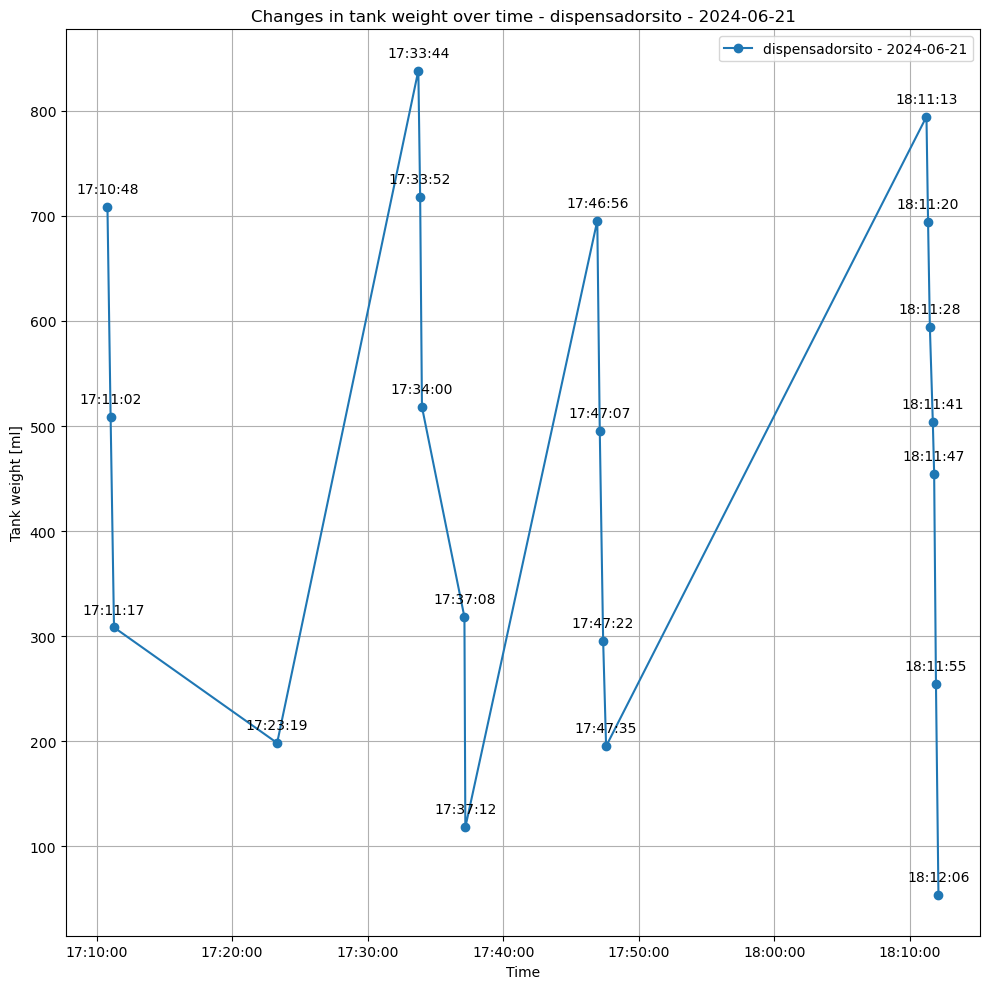

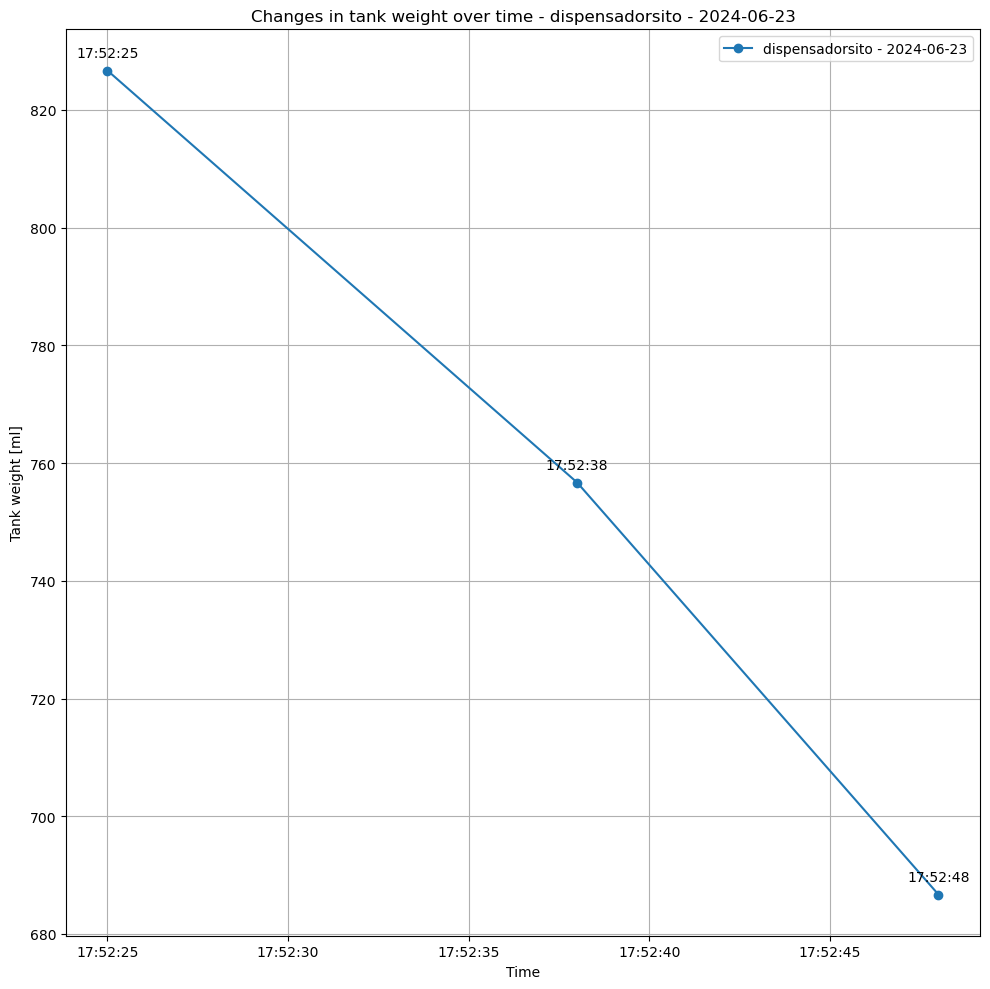

In [84]:
from matplotlib.dates import DateFormatter

df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.date
dataOrderedByDate = df.sort_values(by='date')
dispensers = dataOrderedByDate.groupby('thingName')

for iterator, dispenser in dispensers:
    days = dispenser.groupby('day')
    
    for day, dayData in days:
        plt.figure(figsize=(10,10))
        plt.plot(dayData['date'], dayData['remainingWater'], marker='o', linestyle='-', label=f"{iterator} - {day}")
        
        for date, remainingWater in zip(dayData['date'], dayData['remainingWater']):
            plt.annotate(date.strftime('%H:%M:%S'),  
                         (date, remainingWater),   
                         textcoords="offset points",  
                         xytext=(0,10),            
                         ha='center')  
            
        formatter = mdates.DateFormatter("%H:%M:%S") ; 
        formatter.set_tzinfo(timezone('America/La_Paz')); 
        plt.gca().xaxis.set_major_formatter(formatter)
        plt.title(f'Changes in tank weight over time - {iterator} - {day}')
        plt.xlabel('Time')
        plt.ylabel('Tank weight [ml]')
        plt.xticks(rotation=0)
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

# Dispensed water volume preference

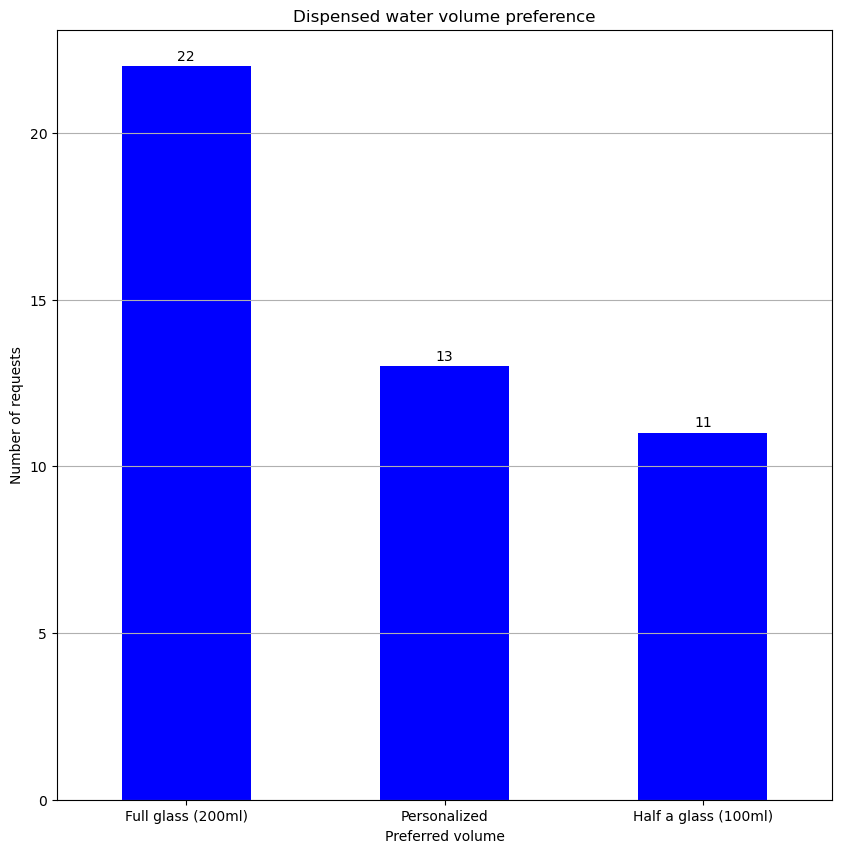

In [85]:
def volumeType(volume):
    if volume == 200:
        return 'Full glass (200ml)'
    elif volume == 100:
        return 'Half a glass (100ml)'
    else:
        return 'Personalized'
    
df['volumeType'] = df['dispensedWater'].apply(volumeType)
volumeTypeCounting = df['volumeType'].value_counts()
plt.figure(figsize=(10, 10))
volumeTypeCounting.plot(kind='bar', color='blue')
plt.title('Dispensed water volume preference')
plt.xlabel('Preferred volume')
plt.ylabel('Number of requests')
plt.xticks(rotation=0)

for iterator, numberOfRequests in enumerate(volumeTypeCounting):
    plt.text(iterator, numberOfRequests+0.1 , str(numberOfRequests), ha='center', va='bottom', fontsize=10)
    
plt.grid(axis='y')
plt.show()


# Scatter plot of the relationship between time of day and dispensed volume

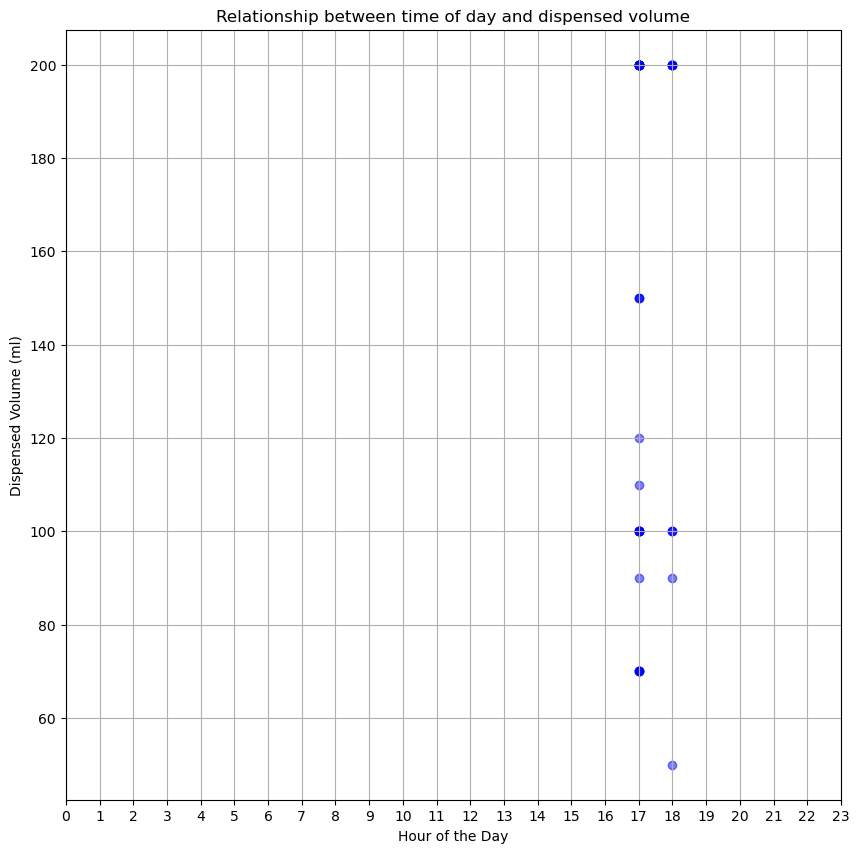

In [86]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
plt.figure(figsize=(10, 10))
plt.scatter(df['hour'], df['dispensedWater'], color='blue',alpha=0.5)
plt.title('Relationship between time of day and dispensed volume')
plt.xlabel('Hour of the Day')
plt.ylabel('Dispensed Volume (ml)')
plt.grid()
plt.xticks(range(0, 24))
plt.show()

# Gráfico de lineas de la tendencia de uso por dia de la semana

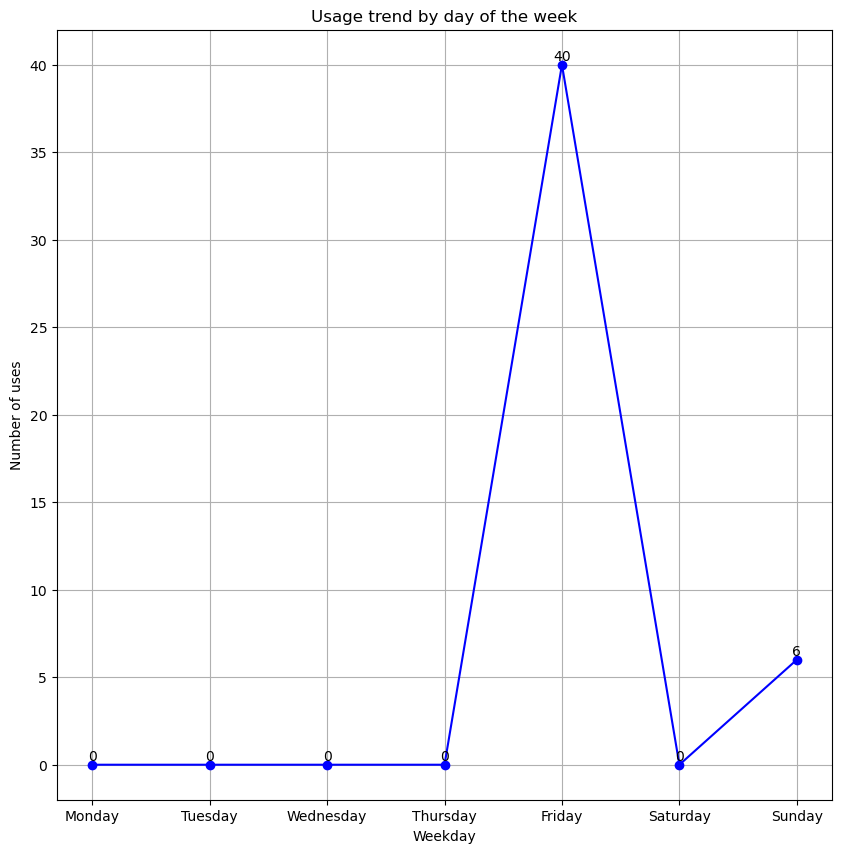

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
df['dayOfWeek'] = df['date'].dt.day_name()
usageByDay = df['dayOfWeek'].value_counts()
usageByDayOrdered = usageByDay.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
usageByDayOrdered = usageByDayOrdered.fillna(0)
plt.figure(figsize=(10, 10))
plt.plot(usageByDayOrdered.index, usageByDayOrdered.values, marker='o', linestyle='-', color='blue')
plt.title('Usage trend by day of the week')
plt.xlabel('Weekday')
plt.ylabel('Number of uses')

for i, uses in enumerate(usageByDayOrdered.values):
    plt.text(i, uses + 0.1, str(int(uses)), ha='center', va='bottom', fontsize=10)

plt.grid()
plt.show()
